Importing the necessary libraries here:

In [153]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

Read the datasets!

In [154]:
fff_df = pd.read_csv("./datasets/fff_injection.csv")
rpm_df = pd.read_csv("./datasets/rpm_injection.csv")
no_df = pd.read_csv("./datasets/no_injection.csv")

In [155]:
fff_df.head()

,Unnamed: 0,RPM,Speed,attack
0,0,313.0,0.0,0
1,1,0.0,0.0,0
2,2,312.0,0.0,0
3,3,0.0,0.0,0
4,4,312.0,0.0,0


In [156]:
rpm_df.head()

,Unnamed: 0,RPM,Speed,attack
0,0,370,0,0
1,1,0,855,0
2,2,371,0,0
3,3,0,855,0
4,4,372,0,0


In [157]:
no_df.head()

,Unnamed: 0,RPM,Speed,attack
0,0,318.0,0.0,0
1,1,0.0,0.0,0
2,2,320.0,0.0,0
3,3,0.0,0.0,0
4,4,320.0,0.0,0


In [158]:
fff_df.describe()

,Unnamed: 0,RPM,Speed,attack
count,14435.000000,14435.000000,14435.000000,14435.000000
mean,7217.000000,102.469900,195.216189,0.623069
std,4167.169903,202.897803,436.871821,0.484634
min,0.000000,0.000000,0.000000,0.000000
25%,3608.500000,0.000000,25.445150,0.000000
50%,7217.000000,0.000000,25.445150,1.000000
75%,10825.500000,0.000000,25.445150,1.000000
max,14434.000000,886.000000,1951.000000,1.000000


In [159]:
rpm_df.describe()

,Unnamed: 0,RPM,Speed,attack
count,4543.000000,4543.000000,4543.000000,4543.000000
mean,2271.000000,76281.784284,208.830068,0.581114
std,1311.595466,64538.521120,470.761753,0.493431
min,0.000000,0.000000,0.000000,0.000000
25%,1135.500000,372.000000,0.000000,0.000000
50%,2271.000000,131070.000000,0.000000,1.000000
75%,3406.500000,131070.000000,0.000000,1.000000
max,4542.000000,131070.000000,1738.000000,1.000000


In [160]:
no_df.describe()

,Unnamed: 0,RPM,Speed,attack
count,1649.000000,1649.000000,1649.000000,1649.000000
mean,824.000000,470.700424,736.288866,0.094603
std,476.169613,472.974474,1249.830516,0.292754
min,0.000000,0.000000,0.000000,0.000000
25%,412.000000,0.000000,0.000000,0.000000
50%,824.000000,378.000000,0.000000,0.000000
75%,1236.000000,987.000000,1186.000000,0.000000
max,1648.000000,1285.000000,4078.000000,1.000000


In [161]:
fff_df = fff_df[["RPM", "Speed"]]
rpm_df =rpm_df[["RPM", "Speed"]]
no_df = no_df[["RPM", "Speed"]]
print(fff_df.head())
print(rpm_df.head())
print(no_df.head())

     RPM  Speed
0  313.0    0.0
1    0.0    0.0
2  312.0    0.0
3    0.0    0.0
4  312.0    0.0
   RPM  Speed
0  370      0
1    0    855
2  371      0
3    0    855
4  372      0
     RPM  Speed
0  318.0    0.0
1    0.0    0.0
2  320.0    0.0
3    0.0    0.0
4  320.0    0.0


LETS FIT A KMEANS MODEL!

In [162]:
def create_new_fitted_model(df):
    model = KMeans(n_clusters=2)
    model.fit(df)
    return model

In [163]:
def create_scatter_plot(df, kmeans, title):
    labels = kmeans.labels_
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        plt.scatter(df["RPM"][labels == label], df["Speed"][labels == label], label=f"Cluster {label}")
    
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="x", label="Centroids")
    plt.xlabel("RPM")
    plt.ylabel("Speed")
    plt.title(title)
    
    for i, centroid in enumerate(kmeans.cluster_centers_):
        plt.annotate(f"({centroid[0]:.2f}, {centroid[1]:.2f})", (centroid[0], centroid[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')
    
    plt.legend()
    plt.show()


In [164]:
model_fff_injection = create_new_fitted_model(fff_df)
model_fff_injection

c:\Users\Sanju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

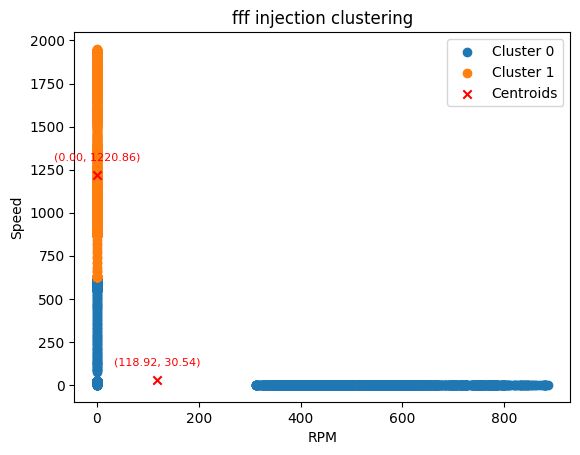

In [165]:
create_scatter_plot(fff_df, model_fff_injection, "fff injection clustering")

As we can see two centriods formed are:
Speed = 0.00 and RPM = 1220.86
-   All of the attacks have been captured within this cluster. Along with some false positives.
speed = 118.92 and RPM = 30.54
- All non attack samples have been captured here!

In [166]:
model_rpm_injection = create_new_fitted_model(rpm_df)
model_rpm_injection

c:\Users\Sanju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

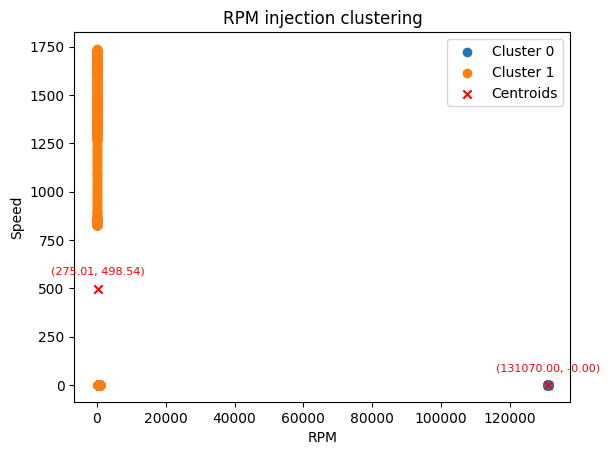

In [167]:
create_scatter_plot(rpm_df, model_rpm_injection, "RPM injection clustering")

The RPM injection clustering is a much more close to perfect fit as there are no over lapping points. The two clusters formed are:

Speed = 275.01 and RPM = 498.54
-   All of the attacks have been put in this cluster within the range of Speed beint 0 to 1750, majority of these have Speed between 750, 1750. And zero RPM.

Speed 131070 and RPM = 0.00
- All of the non attack points have been clustered very well within this!

In [168]:
model_no_injection = create_new_fitted_model(no_df)
model_no_injection

c:\Users\Sanju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

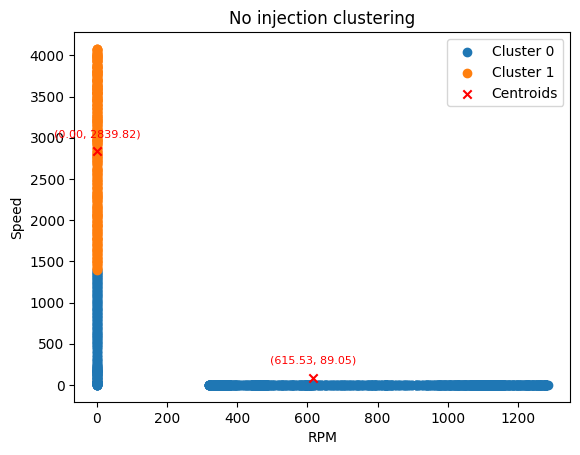

In [169]:
create_scatter_plot(no_df, model_no_injection, "No injection clustering")

It looks like the k-means clustering algo has created two clusters for each model as we asked it to. there are points which are put in either of these clusters.

TASK 3: Isolation Forest Clustering!

In [170]:
def create_new_fitted_isolation_model(df):
    isolation_forest = IsolationForest(contamination="auto")
    isolation_forest.fit(df)
    return isolation_forest

In [171]:
def create_if_scatter_plot(df, isolation_forest, title):
    anomaly_scores = isolation_forest.decision_function(df)
    outliers = isolation_forest.predict(df)
    
    plt.scatter(df["RPM"][outliers == 1], df["Speed"][outliers == 1], label="Inliers")
    plt.scatter(df["RPM"][outliers == -1], df["Speed"][outliers == -1], label="Outliers")
    plt.xlabel("RPM")
    plt.ylabel("Speed")
    plt.title(title)
    plt.legend()
    plt.show()
    
    anomalies = df[outliers == -1]
    print(f"Anomalies for {title}:")
    print(anomalies)


In [172]:
model_if_fff_injection = create_new_fitted_isolation_model(fff_df)
model_if_fff_injection

IsolationForest()

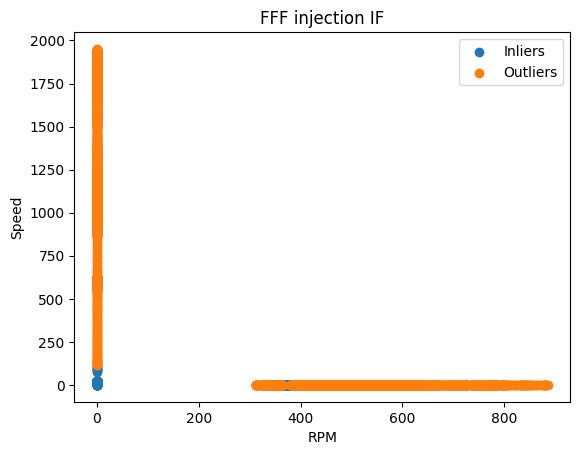

Anomalies for FFF injection IF:
         RPM  Speed
0      313.0    0.0
2      312.0    0.0
4      312.0    0.0
5      313.0    0.0
7      313.0    0.0
...      ...    ...
14420  443.0    0.0
14424  450.0    0.0
14428  453.0    0.0
14430    0.0  883.0
14433  453.0    0.0

[4492 rows x 2 columns]


In [173]:
create_if_scatter_plot(fff_df, model_if_fff_injection, "FFF injection IF")

In [174]:
model_if_rpm_injection = create_new_fitted_isolation_model(rpm_df)
model_if_fff_injection

IsolationForest()

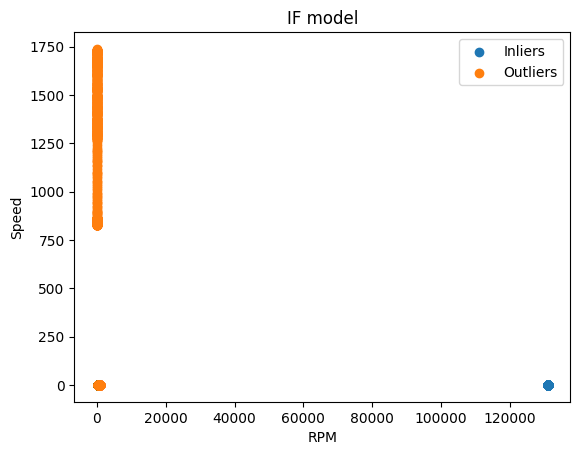

Anomalies for IF model:
      RPM  Speed
1       0    855
3       0    855
5       0    855
8       0    860
10      0    860
...   ...    ...
4530  445      0
4532    0   1276
4535  442      0
4538    0   1276
4540  441      0

[1449 rows x 2 columns]


In [176]:
create_if_scatter_plot(rpm_df, model_if_rpm_injection, "IF model")

In [178]:
model_if_no_injection = create_new_fitted_isolation_model(no_df)
model_if_no_injection

IsolationForest()

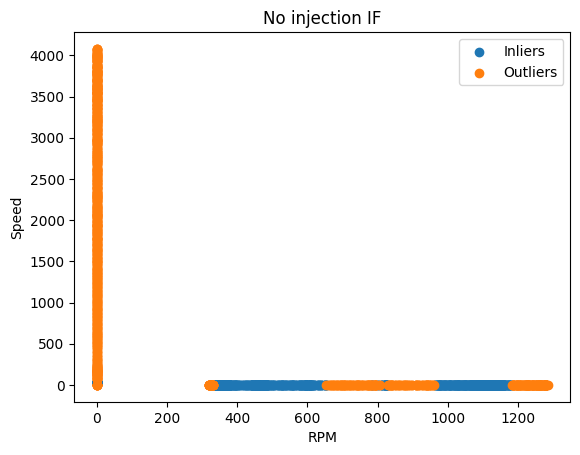

Anomalies for No injection IF:
        RPM  Speed
0     318.0    0.0
1       0.0    0.0
2     320.0    0.0
3       0.0    0.0
4     320.0    0.0
...     ...    ...
1639    0.0  545.0
1641    0.0  523.0
1643    0.0  506.0
1646    0.0  489.0
1648    0.0  472.0

[814 rows x 2 columns]


In [179]:
create_if_scatter_plot(no_df, model_if_no_injection, "No injection IF")

Discussion:

I tried to explore the use of Kmeans and Isolation Forest Algorithms for this assignment, to identify anomalies and detect difference between genuine and injected samples. 

    Although these algorithms can detect patterns and make clusters of points, they might not be alwyas be the best way to detect injected data points. Upon some studying about unsupervised learning for this assignment I understood that unsupervised techniques depend heavliy of inherent structure of the data and don't have any prior information about this data. This can lead to higher confusion.

Inorder to solve this problem better we could probably use a supervised learning algorithm like Logistic Regression to perform classification of this set without dropping the attack label. However for these unsupervised algorithsm we could possibly experiment with hyperparameters and also make sure our data is relevant and does not contain any noisy, or null values.
